# Multi-Armed Bandits

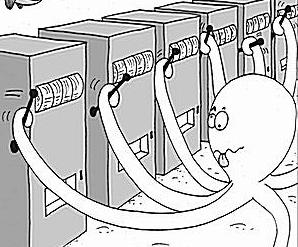

Last time, we used A/B testing to determine if a potential change to a website will improve ad-clicks on our page. However, A/B testing had the following shortcoming:
* You have to show a large number of users an inferior page in order to gather information on determining whether to make a change.
* What if your change had a negative effect? Since A/B-tests must run for a predetermined period of time, you may lose an unnecessary amount of traffic before realizing the test is failing.

[Multi-armed bandits](https://en.wikipedia.org/wiki/Multi-armed_bandit) are models that try to continuously balance **exploring** the best options for showing to website users, while simultaneously **exploiting** the current perceived best options.

The motivating example is that of $N$ different slot machines, each with different expected pay-out. The goal is to define a strategy that maximizes the pay-out after a total $k$ pulls of the levers.

For online advertising, each slot-machine corresponds to a different advertisement that can be displayed to a user. Each advertisment has a different unknown effectiveness (i.e. click-rate) and the multi-armed bandit algorithm tries to maximize the click-rate of the ads shown over time.

Below, use the multi-armed bandit below to develop a strategy to get the max number of rewards in a fixed time (say 100 pulls).

In [ ]:
%matplotlib inline

import matplotlib.pyplot as mpl
import numpy as np
#from datascience import *

from mab import Simulator

## Create an N-armed bandit
* `sim = Simulator(N)` creates an N-armed bandit
* `sim.pull(k)` pulls the kth arm of sim (zero-indexed).
    - Returns the reward of the pull: 0 or 1.

* `sim.count` returns the current number of pulls for that simulator.
* `sim.record` returns the current number of pulls for each arm.
* `sim.success` returns the current number of rewards for each arm.

Note: optionally, to recreate the *same* multi-armed bandit, set the `seed` argument in `Simulator`.

Check which arm is working best! 

You put 1 dollar each time you pull, you get back 3 dollars if you win

In [ ]:
# Create a 10-armed bandit
sim = Simulator(10)

In [ ]:
# Pull lever 3 (the fourth lever)
sim.pull(3)

In [ ]:
# Pull lever 4 (the fifth lever)
sim.pull(4)

In [ ]:
# Look at the number of pulls for each lever
sim.record

In [ ]:
# Look at the number of rewards each arm has accumulated
sim.success

In [ ]:
# The average success rate of each lever
sim.success / sim.record

In [ ]:
# Explore! Your code here!

### Defining Strategies

Strategies for multi-armed bandits must balance **exploration**, to find the most effective lever, and **exploitation** of the best known options available. Below gives two extreme/obvious strategies for bandit algorithms.

1. "Always pull lever #3"
2. "Randomly choose a lever each turn"

*Note:* Algorithm 2 provides a good baseline to measure your algorithms against. In this case, the null hypothesis is: "My bandit algorithm provides the same performance as random choice." Can we reject this hypothesis?

In [ ]:
# Parameters:
# Change these as you wish!

N = 100
levers = 10
seed = 51

sim_third = Simulator(levers, seed)
sim_third.probs

In [ ]:
# Always pull lever #3

sim_third = Simulator(levers, seed)

# let's define an empy vector for the results
results_third = np.array([])
for _ in np.arange(N):
    pull = sim_third.pull(3)
    results_third = np.append(pull, results_third)
    
    

In [ ]:
# Reward per pull
results_third.mean()

In [ ]:
# Pull a new randomly chosen lever each turn

sim_random = Simulator(levers, seed)
results_random = np.array([])
for _ in np.arange(N):
    pull = sim_random.pull(np.random.choice(np.arange(levers)))
    results_random = np.append(pull, results_random)

In [ ]:
# Reward per pull
results_random.mean()

In [ ]:
# plot the results: YOUR CODE


In [ ]:
# Plot the payoff ($ earned - $ spent) after each of the 100 pulls 
# YOUR CODE


In [ ]:
# Look at the success of each arm in the simulation:
sim_random.success / sim_random.record

In [ ]:
sim_third.success / sim_third.record

**Question**: Is choosing the third arm better than random? What if you increase the number of pulls?

In [ ]:
# Your code here (Skip this initially!)

### Strategy: test then greedy

For a ten-armed bandit, code a strategy that randomly chooses a lever for the first 10 pulls. At this point, calculate the best lever and pull that lever from then on. 

* Compare this strategy to the ones given above
* Rereun this test many times. How many times does it choose the correct lever?
    - What happens if you increase/decrease the number of "exploration" pulls?
    - *Hint:* you have to change/remove the seed.

In [ ]:
# Code Here

**Question**: What happens if you increase the number of levers? (What if the number of levers is huge?)

---
Write explanation here.

---

In [ ]:
# Code Here

### Strategy: Upper Confidence Bound (UCB)

This is one of the most popular bandit algorithms. Start by choosing each arm once. Then define for each arm (after each pull):
$$m_j + \sqrt{\frac{2\ln N}{N_j}}$$


* where $m_j$ is the current average reward of arm $j$,
* where $N$ is the number of pulls, and
* where $N_j$ is the number of pulls on lever $j$.

...and run each time the arm $j$ corresponding to the highest $m_j$.

The UCB strategy is coded below. 
* Run an experiment comparing all the strategies defined so far. 
* Vary the seed, number of levers, number of pulls.
* For 10000 pulls and 10 arms, plot the number times at each arm has been pulled at each step.
    - You will need a table with a column for each lever, and each row containing the pull-counts for that pull.

In [ ]:
def pull_ucb(levers, seed, N):
    
    sim = Simulator(levers, seed)
    results = np.array([])
    for lever in np.arange(levers):
        pull = sim.pull(lever)
        results = np.append(pull, results)    

    for _ in np.arange(N - levers):
        ucb_scores = sim.success / sim.record + np.sqrt(2 * np.log(sim.count) / sim.record)
        k = np.argmax(ucb_scores)
        pull = sim.pull(k)
        results = np.append(pull, results)

    return sim, results

In [ ]:
# Code Here

In [ ]:
# Code Here

**Question**: Suppose you have 10 potential new ads to show users and you'd like to test them using the UCB strategy in order to pick the best performer. Describe a procedure for running and evaluating the test. Make sure the valuation can distinguish signal from noise!

### Strategy: $\epsilon$-greedy

Pick $\epsilon > 0$. Define the following strategy:
1. If every lever has the same average success, randomly pull a lever.
2. Otherwise:
    - pull the lever with the highest average success with probability $(1 - \epsilon)$ -- exploitation,
    - randomly pick a lever with probability $\epsilon$ -- exploration.
    
**Question**: Code this strategy using $\epsilon = 0.02$.

*Hint*: simulate the probabilities using `np.random.uniform`.

In [ ]:
# Code Here